# Read, modify, and extract data from network and catchment Res1D files

With mikeio1d it is possible:
* Read res1d file data into pandas data frame
* Modify the res1d file contents using data frame
* Extract res1d time series data to `csv`, `dfs0`, or `txt` files

Currently there are the following types of res1d files:
* Network
* Catchment
* Long Term Statistics (events), see [res1d_lts.ipynb](res1d_lts.ipynb)
* Long Term Statistics (chronological), see [res1d_lts.ipynb](res1d_lts.ipynb)
* Simple statistics (not fully supported by mikeio1d)

In this notebook we will give examples how to work with network and catchment res1d files.

In [1]:
from mikeio1d import Res1D

## Network result file

Load network result file into mikeio1d Res1D object and print basic information about the file:

In [2]:
file_path_network = '../tests/testdata/network.res1d'
res1d_network = Res1D(file_path_network)
res1d_network

<mikeio1d.Res1D>
Start time: 1994-08-07 16:35:00
End time: 1994-08-07 18:35:00
# Timesteps: 110
# Catchments: 0
# Nodes: 119
# Reaches: 118
# Globals: 0
0 - WaterLevel <m>
1 - Discharge <m^3/s>

Let's read the entire network res1d file time series data into a data frame and show just the first time steps:

In [3]:
df_network = res1d_network.read_all()
df_network.head()

,WaterLevel:1,WaterLevel:2,WaterLevel:3,WaterLevel:4,WaterLevel:5,WaterLevel:6,WaterLevel:7,WaterLevel:8,WaterLevel:9,WaterLevel:10,...,Discharge:99l1:22.2508,WaterLevel:9l1:0,WaterLevel:9l1:10,Discharge:9l1:5,WaterLevel:Weir:119w1:0,WaterLevel:Weir:119w1:1,Discharge:Weir:119w1:0.5,WaterLevel:Pump:115p1:0,WaterLevel:Pump:115p1:82.4281,Discharge:Pump:115p1:41.214
1994-08-07 16:35:00,195.053,195.8215,195.8815,193.605,193.615,193.6250,193.6750,193.7650,193.7750,193.805,...,0.000002,193.7750,193.7650,0.000031,193.5500,188.48,0.0,193.3050,195.005,0.0
1994-08-07 16:36:01,195.053,195.8217,195.8815,193.605,193.615,193.6253,193.6751,193.7651,193.7751,193.805,...,0.000002,193.7751,193.7651,0.000031,193.5500,188.48,0.0,193.3061,195.005,0.0
1994-08-07 16:37:07,195.053,195.8216,195.8815,193.605,193.615,193.6257,193.6754,193.7651,193.7755,193.805,...,0.000002,193.7754,193.7651,0.000033,193.5500,188.48,0.0,193.3071,195.005,0.0
1994-08-07 16:38:55,195.053,195.8215,195.8815,193.605,193.615,193.6262,193.6758,193.7652,193.7761,193.805,...,0.000002,193.7759,193.7652,0.000037,193.5501,188.48,0.0,193.3089,195.005,0.0
1994-08-07 16:39:55,195.053,195.8215,195.8815,193.605,193.615,193.6266,193.6759,193.7653,193.7764,193.805,...,0.000002,193.7762,193.7653,0.000039,193.5501,188.48,0.0,193.3099,195.005,0.0


To retrieve water level in the link **l100l1** (the upstream **chainage=0** and the downstream **chainage=47.6827**) can be retrieved and plotted as:

In [4]:
df_network[['WaterLevel:100l1:0','WaterLevel:100l1:47.6827']]

,WaterLevel:100l1:0,WaterLevel:100l1:47.6827
1994-08-07 16:35:00,195.4415,194.6615
1994-08-07 16:36:01,195.4415,194.6616
1994-08-07 16:37:07,195.4415,194.6617
1994-08-07 16:38:55,195.4415,194.6618
1994-08-07 16:39:55,195.4415,194.6620
...,...,...
1994-08-07 18:30:07,195.4551,194.6891
1994-08-07 18:31:07,195.4551,194.6889
1994-08-07 18:32:07,195.4550,194.6888
1994-08-07 18:33:07,195.4530,194.6884


<AxesSubplot:>

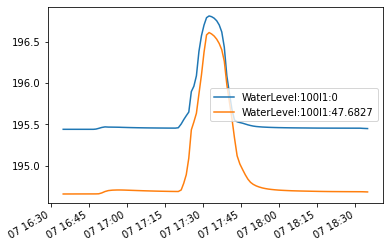

In [5]:
df_network[['WaterLevel:100l1:0','WaterLevel:100l1:47.6827']].plot()

## Catchment result file

Load network result file into mikeio1d Res1D object and print basic information about the file:

In [6]:
file_path_catchments = '../tests/testdata/catchments.res1d'
res1d_catchments = Res1D(file_path_catchments)
res1d_catchments

<mikeio1d.Res1D>
Start time: 1994-08-07 16:35:00
End time: 1994-08-07 18:35:00
# Timesteps: 108
# Catchments: 31
# Nodes: 0
# Reaches: 0
# Globals: 0
0 - TotalRunOff <m^3/s>
1 - ActualRainfall <m/s>
2 - ZinkLoadRR <kg/s>
3 - ZinkMassAccumulatedRR <kg>
4 - ZinkRR <mg/l>

Let's read the entire network res1d file time series data into a data frame and show just the first time steps:

In [7]:
df_catchments = res1d_catchments.read_all()
df_catchments.head()

,TotalRunOff:100_16_16,ActualRainfall:100_16_16,ZinkLoadRR:100_16_16,ZinkMassAccumulatedRR:100_16_16,ZinkRR:100_16_16,TotalRunOff:105_1_1,ActualRainfall:105_1_1,ZinkLoadRR:105_1_1,ZinkMassAccumulatedRR:105_1_1,ZinkRR:105_1_1,...,TotalRunOff:94_9_9,ActualRainfall:94_9_9,ZinkLoadRR:94_9_9,ZinkMassAccumulatedRR:94_9_9,ZinkRR:94_9_9,TotalRunOff:9_3_3,ActualRainfall:9_3_3,ZinkLoadRR:9_3_3,ZinkMassAccumulatedRR:9_3_3,ZinkRR:9_3_3
1994-08-07 16:35:00,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0,...,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0
1994-08-07 16:36:00,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0,...,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0
1994-08-07 16:37:00,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0,...,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0
1994-08-07 16:38:00,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0,...,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0
1994-08-07 16:39:00,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0,...,0.0,3.333333e-07,0.0,0.0,100.0,0.0,3.333333e-07,0.0,0.0,100.0


## Access quantity and network/catchment information

List quantities found in a network and catchment res1d files as a list of strings:

In [8]:
res1d_network.quantities

['WaterLevel', 'Discharge']

In [9]:
res1d_catchments.quantities

['TotalRunOff',
 'ActualRainfall',
 'ZinkLoadRR',
 'ZinkMassAccumulatedRR',
 'ZinkRR']

List nodes/reaches in a file as dictionaries from node/reach id to an object representing the node/reach:

In [10]:
res1d_network.nodes

{'1': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x0000027376AF5E20>,
 '2': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x0000027376AE9AC0>,
 '3': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF2CF10>,
 '4': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF2CA90>,
 '5': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F100>,
 '6': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x0000027376AF5D00>,
 '7': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF2CF70>,
 '8': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F400>,
 '9': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F520>,
 '10': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F640>,
 '11': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F760>,
 '13': <DHI.Mike1D.ResultDataAccess.Res1DManhole object at 0x000002731FF3F880>,
 '14': <DHI.Mike1D.ResultDataAccess.Res1DManhole 

In [11]:
res1d_network.reaches

{'100l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732048C430>,
 '101l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732048C4F0>,
 '102l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732048C8B0>,
 '103l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732048CC70>,
 '104l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732048CFD0>,
 '105l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x0000027320494340>,
 '106l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x00000273204946A0>,
 '107l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x00000273204949D0>,
 '108l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x0000027320494D30>,
 '109l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732049A0D0>,
 '10l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732049A430>,
 '110l1': <DHI.Mike1D.ResultDataAccess.Res1DReach object at 0x000002732049A790>,
 '111l1': <DHI.Mike1D.ResultD

List catchments in a file as dictionaries from catchment id to an object representing the catchment:

In [12]:
res1d_catchments.catchments

{'100_16_16': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732272B790>,
 '105_1_1': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x0000027376AE34F0>,
 '10_22_22': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x00000273247C8B80>,
 '113_21_21': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732484EBE0>,
 '118_30_30': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732484EA00>,
 '119_32_32': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732484EDF0>,
 '14_20_20': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x00000273247C8220>,
 '20_2_2': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732485A400>,
 '22_8_8': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732485A760>,
 '25_26_26': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732485AAC0>,
 '28_6_6': <DHI.Mike1D.ResultDataAccess.Res1DCatchment object at 0x000002732485AE20>,
 '29_4_4': <DHI.Mike1D.ResultDataAc

## Query specific time series using query classes

In mikeio1d it is possible to load specific time series data using queries. Currently there are the following query classes:
* `QueryDataCatchment`
* `QueryDataNode`
* `QueryDataReach`
* `QueryDataStructure`
* `QueryDataGlobal`

In [13]:
from mikeio1d.res1d import QueryDataNode, QueryDataReach, QueryDataCatchment

In [14]:
# Read a specific reach
query1 = QueryDataNode('WaterLevel', '1')

# Read a specific reach and chainage
query2 = QueryDataReach('WaterLevel', '104l1', 34.4131)

# Combine queries to extract in one go
queries_network = [query1, query2]

<AxesSubplot:>

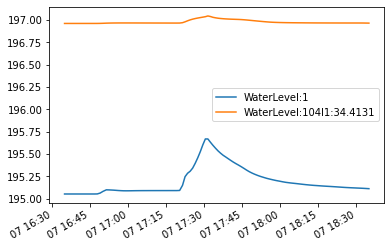

In [15]:
df_network_query = res1d_network.read(queries_network)
df_network_query.plot()

In [16]:
# Read a specific catchment
query1 = QueryDataCatchment('TotalRunOff', '100_16_16')

# Read another specific catchment
query2 = QueryDataCatchment('TotalRunOff', '105_1_1')

# Combine queries to extract in one go
queries_catchments = [query1, query2]

<AxesSubplot:>

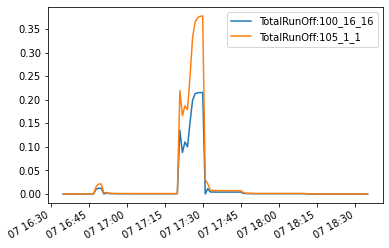

In [17]:
df_catchments_query = res1d_catchments.read(queries_catchments)
df_catchments_query.plot()

## Querying specific time series using auto-completion

It is possible to query data with auto-completion using the following properties of the Res1D object:
* `catchments`
* `nodes`
* `reaches`
* `structures`
* `global_data`

The variable name generated for auto-completion will have a particular string appended if the location id starts with a number or other special character not supported in Python variable names.
The appended strings are:
* catchments : `c_`
* nodes: `n_`
* reaches: `r_`
* structures: `s_`
* global data: `g_`
* chainages: `m_`

Here is an example to query water level on the reach **100l1** (chainages **m=0**, **m=47.6827**) and node **100**

<AxesSubplot:>

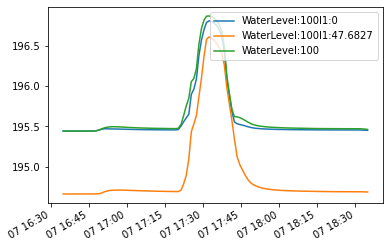

In [18]:
# Assign aliases for reaches and nodes
reaches = res1d_network.reaches
nodes = res1d_network.nodes

# Add to to current active queries
reaches.r_100l1.m_0.WaterLevel.add()
reaches.r_100l1.m_47_6827.WaterLevel.add()
nodes.n_100.WaterLevel.add()

# Read the current active query
df_network_query = res1d_network.read()
df_network_query.plot()

<AxesSubplot:>

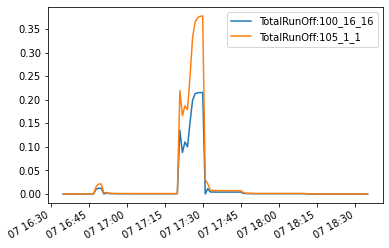

In [19]:
# Assign alias for catchments
catchments = res1d_catchments.catchments

# Add to to current active queries
catchments.c_100_16_16.TotalRunOff.add()
catchments.c_105_1_1.TotalRunOff.add()

# Read the current active query
df_catchments_query = res1d_catchments.read()
df_catchments_query.plot()

## Filtered reading of the result files

It is possible to load a res1d file in a filtered way, that only specified locations are loaded into memory. Let's load nodes **1**, **2**, **3**, and reach **99l1**.

In [20]:
file_path_network = '../tests/testdata/network.res1d'
res1d_network_filtered = Res1D(file_path_network, nodes=['1', '2', '3'], reaches=['99l1'])
df_network_filtered = res1d_network_filtered.read_all()
df_network_filtered

,WaterLevel:1,WaterLevel:2,WaterLevel:3,WaterLevel:99l1:0,WaterLevel:99l1:44.5016,Discharge:99l1:22.2508
1994-08-07 16:35:00,195.0530,195.8215,195.8815,194.6615,194.5815,0.000002
1994-08-07 16:36:01,195.0530,195.8217,195.8815,194.6616,194.5815,0.000002
1994-08-07 16:37:07,195.0530,195.8216,195.8815,194.6617,194.5815,0.000002
1994-08-07 16:38:55,195.0530,195.8215,195.8815,194.6619,194.5815,0.000002
1994-08-07 16:39:55,195.0530,195.8215,195.8815,194.6619,194.5815,0.000002
...,...,...,...,...,...,...
1994-08-07 18:30:07,195.1199,195.8228,195.8815,194.6857,194.6076,0.000605
1994-08-07 18:31:07,195.1186,195.8228,195.8815,194.6856,194.6074,0.000600
1994-08-07 18:32:07,195.1173,195.8228,195.8815,194.6855,194.6073,0.000595
1994-08-07 18:33:07,195.1158,195.8228,195.8815,194.6851,194.6071,0.000589


Similarly for catchments. Let's load data for catchment **100_16_16**.

In [21]:
file_path_catchments = '../tests/testdata/catchments.res1d'
res1d_catchments_filtered = Res1D(file_path_catchments, catchments=['100_16_16'])
df_catchments_filtered = res1d_catchments_filtered.read_all()
df_catchments_filtered

,TotalRunOff:100_16_16,ActualRainfall:100_16_16,ZinkLoadRR:100_16_16,ZinkMassAccumulatedRR:100_16_16,ZinkRR:100_16_16
1994-08-07 16:35:00,0.0,3.333333e-07,0.0,0.00000,100.0
1994-08-07 16:36:00,0.0,3.333333e-07,0.0,0.00000,100.0
1994-08-07 16:37:00,0.0,3.333333e-07,0.0,0.00000,100.0
1994-08-07 16:38:00,0.0,3.333333e-07,0.0,0.00000,100.0
1994-08-07 16:39:00,0.0,3.333333e-07,0.0,0.00000,100.0
...,...,...,...,...,...
1994-08-07 18:18:00,0.0,0.000000e+00,0.0,10.66167,100.0
1994-08-07 18:19:00,0.0,0.000000e+00,0.0,10.66167,100.0
1994-08-07 18:20:00,0.0,0.000000e+00,0.0,10.66167,100.0
1994-08-07 18:24:00,0.0,0.000000e+00,0.0,10.66167,100.0


## Modifying a res1d file

Here we will show how to modify a res1d file. Such functionality is useful for modifications of a hotstart file.

In [22]:
file_path_network = '../tests/testdata/network.res1d'
res1d_network_mod = Res1D(file_path_network)

Let's load all node water level time series:

In [23]:
res1d_network_mod.nodes.WaterLevel.add()
df_network_mod = res1d_network_mod.read(column_mode='all')
print('Current maximum water level: ', df_network_mod.max().max())

Current maximum water level:  200.0649


Multiply the water level data by a factor of 2 and write it to a new file

In [24]:
df_network_mod = df_network_mod.multiply(2.0)
file_path_new = file_path_network.replace('network.res1d', 'NetworkFactorTwo.res1d')
res1d_network_mod.modify(df_network_mod, file_path=file_path_new)

Load the data again into a data frame

In [25]:
res1d_network_mod.nodes.WaterLevel.add()
df_network_mod = res1d_network_mod.read()
print('Current maximum water level: ', df_network_mod.max().max())

Current maximum water level:  400.1298


Load the newly written file

In [26]:
print('New file path:', file_path_new)
res1d_network_new = Res1D(file_path_new)
res1d_network_new.nodes.WaterLevel.add()
df_network_new = res1d_network_new.read()
print('Current maximum water level:', df_network_new.max().max())

New file path: ../tests/testdata/NetworkFactorTwo.res1d
Current maximum water level: 400.1298


## Extracting time series data to dfs0 file

It is possible to extract the res1d time series data to a dfs0 file. The idea is again to create queries, which are used to pick which time series to extract. Let's extract all node water level:

In [27]:
res1d_network.nodes.WaterLevel.add()
file_path_dfs0 = file_path_network.replace('network.res1d', 'NetworkNodeWaterLevel.dfs0')
res1d_network.to_dfs0(file_path=file_path_dfs0)

## Extracting reach start, end, or sum values as numpy arrays

It is possbile to get time series values as numpy arrays at reach start or end chainage without specifying chainage number

In [28]:
values_start = res1d_network.get_reach_start_values("9l1", "WaterLevel")
values_end = res1d_network.get_reach_end_values("9l1", "WaterLevel") 

Get time series values summed for all gridpoints in reach with given quantity, i.e. useful for getting total volume in reach. 

In [29]:
values_sum = res1d_network.get_reach_sum_values("9l1", "Discharge")

Create pandas time series from `values_sum` and plot

<AxesSubplot:ylabel='9l1: Discharge'>

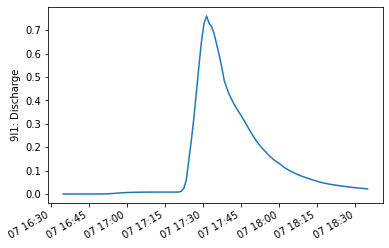

In [30]:
import pandas as pd
pd.Series(values_sum, index = res1d_network.time_index).plot(ylabel="9l1: " + "Discharge")